In [91]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import math 
import random
import pickle
import codecs
import random
import itertools
# %matplotlib inline

In [6]:
folder_folders = os.walk("/home/alone/Documents/finding_no_of_signature_samples/decide_no_of_samples")
folder_list = []
folder_names = []
for root, dirs, files in os.walk("/home/alone/Documents/finding_no_of_signature_samples/decide_no_of_samples", topdown=False):
    for name in dirs:
        if not os.path.isfile(os.path.join(root, name)):
            folder_list.append(os.path.join(root, name))
            folder_names.append(name)
            print (os.path.join(root, name))
# print(folder_list)
print(folder_names)

all_data_dict = {}
for k in range(len(folder_list)):
    all_data = pd.DataFrame(columns=["Lambda"])
    file_list = os.listdir(folder_list[k])
    for j in range(len(file_list)):
        raw_data = open(os.path.join(folder_list[k],file_list[j]), "r")
        f = raw_data.readlines()
        usable_part = f[78:459]
        usable_part = [i.split("  ") for i in usable_part]
        data = pd.DataFrame(usable_part)
        for index,rows in data.iterrows():
            re_pattern = r"(.*)\n"
            data.set_value(index, 2, re.search(re_pattern, rows[2]).group(1))
        data.columns=["Lambda","target","ref"]
        data.ref=pd.to_numeric(data.ref)
        data.target=pd.to_numeric(data.target)
        Reflectance=(data.target)/(data.ref)
        data=data.drop("ref",1)
        data=data.drop("target",1)
        if all_data["Lambda"].empty:
            all_data["Lambda"] = data["Lambda"]
        all_data["R"+str(j+1)]=Reflectance
    all_data_dict [folder_names[k]] = all_data
    
print("All_data_dict is a dictionary where key is folder name and stored values are dataFrame consists of reflectance values of that folder ")

/home/alone/Documents/finding_no_of_signature_samples/decide_no_of_samples/Barium_sulphate_sunlit
/home/alone/Documents/finding_no_of_signature_samples/decide_no_of_samples/Barium_sulphate_shaded
/home/alone/Documents/finding_no_of_signature_samples/decide_no_of_samples/Leaf_Reflectance
['Barium_sulphate_sunlit', 'Barium_sulphate_shaded', 'Leaf_Reflectance']


/home/alone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


All_data_dict is a dictionary where key is folder name and stored values are dataFrame consists of reflectance values of that folder 


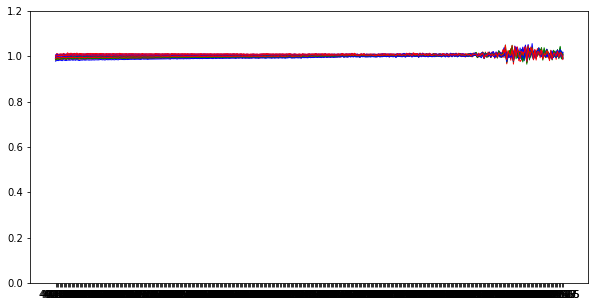

In [41]:
pure=all_data_dict["Barium_sulphate_sunlit"]
# print(pure.tail())
plt.plot(pure.Lambda,pure.R1,color='r',linewidth=1)
plt.plot(pure.Lambda,pure.R2,color='g',linewidth=1)
plt.plot(pure.Lambda,pure.R3,color='b',linewidth=1)
plt.plot(pure.Lambda,pure.R4,color='r',linewidth=1)
plt.plot(pure.Lambda,pure.R5,color='g',linewidth=1)
plt.plot(pure.Lambda,pure.R6,color='b',linewidth=1)
plt.plot(pure.Lambda,pure.R7,color='r',linewidth=1)
plt.plot(pure.Lambda,pure.R8,color='g',linewidth=1)
plt.plot(pure.Lambda,pure.R9,color='b',linewidth=1)
plt.plot(pure.Lambda,pure.R10,color='r',linewidth=1)
plt.plot(pure.Lambda,pure.R11,color='g',linewidth=1)
plt.plot(pure.Lambda,pure.R12,color='b',linewidth=1)
plt.plot(pure.Lambda,pure.R13,color='r',linewidth=1)
plt.plot(pure.Lambda,pure.R14,color='g',linewidth=1)
plt.plot(pure.Lambda,pure.R15,color='b',linewidth=1)
plt.plot(pure.Lambda,pure.R16,color='r',linewidth=1)
plt.plot(pure.Lambda,pure.R17,color='g',linewidth=1)
plt.plot(pure.Lambda,pure.R18,color='b',linewidth=1)
plt.plot(pure.Lambda,pure.R19,color='r',linewidth=1)
# plt.yticks(range(0, 1))
# plt.xticks(range(50),range(400, 1000, 50))
ax=plt.gca()
# print(ax)
ax.set_ylim([0,1.2])
# ax.set_xticks(pure.Lambda, minor=True)
# ax.set_xlim([400.35,998.65])
# ax.set_xticks(np.arange(min(pure.Lambda),))
# plt.tight_layout()
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [25]:
# sam=40
# plt.plot(pure.Lambda[-sam:],pure.R1[-sam:],color='b')
# data=pure.R1[-sam:]
# data.describe()

# sam=50
# plt.plot(pure.Lambda[:-sam],pure.R1[:-sam],color='b')
# data=pure.R1[:-sam]
# data.describe()

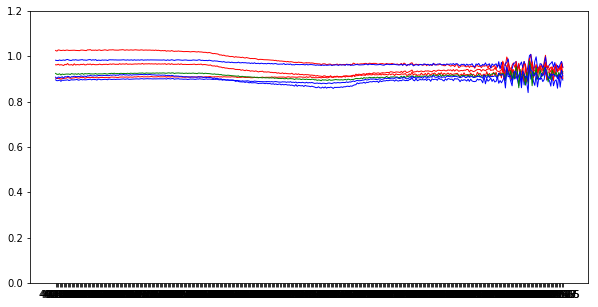

In [40]:
dirt=all_data_dict["Barium_sulphate_shaded"]
plt.plot(dirt.Lambda, dirt.R1,color='r', linewidth=1)
# plt.plot(dirt.Lambda, dirt.R2,color='g', linewidth=1)
plt.plot(dirt.Lambda, dirt.R3,color='b', linewidth=1)
plt.plot(dirt.Lambda, dirt.R4,color='r', linewidth=1)
# plt.plot(dirt.Lambda, dirt.R5,color='g', linewidth=1)
plt.plot(dirt.Lambda, dirt.R6,color='b', linewidth=1)
plt.plot(dirt.Lambda, dirt.R7,color='r', linewidth=1)
plt.plot(dirt.Lambda, dirt.R8,color='g', linewidth=1)
plt.plot(dirt.Lambda, dirt.R9,color='b', linewidth=1)
ax=plt.gca()
ax.set_ylim([0,1.2])
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

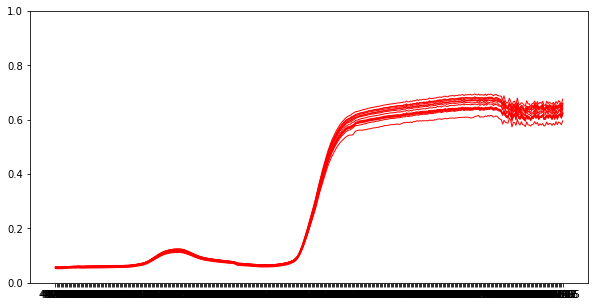

In [74]:
leaf=all_data_dict["Leaf_Reflectance"]
plt.plot(leaf.Lambda, leaf.R1,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R2,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R3,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R4,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R5,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R6,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R7,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R8,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R9,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R10,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R11,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R12,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R13,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R14,color='r', linewidth=1)
plt.plot(leaf.Lambda, leaf.R15,color='r', linewidth=1)
ax=plt.gca()
ax.set_ylim([0,1])
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [137]:
leaf_data=leaf.set_index("Lambda")
leaf_data=leaf_data.T
NIR_leaf_data=leaf_data.iloc[:, -100:]
NIR_leaf_data.head()
NIR_stats=NIR_leaf_data.describe()
NIR_stats

# all_sam=leaf_data.loc[:,"863.52"]
# type(all_sam)
# sample=15
# sampled_data= list(itertools.combinations(all_sam,sample))
# sampled_data
# avg_list=[]
# for i in sampled_data:
#      avg_list.append(np.average(i))
# # print(avg_list)
# # plt.hist(avg_list,bins=100, color='r', histtype="step")
# # plt.show()
# sample_overall_avg=np.average(avg_list)
# print("Overall average: ",sample_overall_avg)
# SD=np.std(avg_list)
# print("Std of the avg_samples: ",SD)

Lambda,849.86,851.38,852.90,854.42,855.94,857.45,858.97,860.49,862.01,863.52,...,985.24,986.73,988.22,989.71,991.20,992.69,994.18,995.67,997.16,998.65
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.643358,0.643404,0.643593,0.645644,0.644637,0.647710,0.647711,0.648860,0.646834,0.648663,...,0.627932,0.620426,0.630869,0.621326,0.632000,0.623230,0.631442,0.634414,0.623287,0.638682
std,0.021657,0.021593,0.021910,0.021536,0.021629,0.021631,0.021711,0.021765,0.021812,0.021941,...,0.021122,0.021686,0.021786,0.020466,0.020556,0.021662,0.021313,0.021302,0.020659,0.021406
min,0.597692,0.598302,0.597442,0.600040,0.599216,0.602089,0.602540,0.603166,0.601193,0.602674,...,0.585766,0.579023,0.586384,0.580331,0.592963,0.581858,0.591528,0.587963,0.581530,0.596029
25%,0.628919,0.628642,0.629320,0.631157,0.630080,0.633139,0.632338,0.634344,0.631972,0.634303,...,0.614051,0.603807,0.614568,0.607169,0.616852,0.608407,0.615545,0.620370,0.608385,0.622974
50%,0.643466,0.643210,0.644388,0.645524,0.644997,0.648680,0.647333,0.649313,0.646420,0.649218,...,0.625182,0.620330,0.628477,0.619597,0.631852,0.621681,0.629728,0.637346,0.615920,0.641005
75%,0.659989,0.659362,0.660394,0.662010,0.660783,0.664189,0.664401,0.665364,0.663222,0.664922,...,0.647628,0.636853,0.649341,0.636527,0.648704,0.641040,0.649584,0.652778,0.640070,0.656605
max,0.677953,0.678110,0.678744,0.680217,0.679462,0.682325,0.682555,0.683829,0.682098,0.683716,...,0.660949,0.656968,0.664349,0.654899,0.667037,0.658923,0.670197,0.664352,0.657264,0.675851


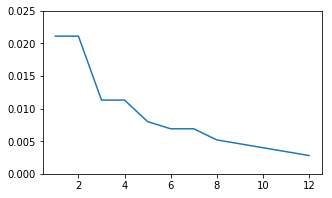

In [138]:
#These SD_avg values are obtained after running above block script for many times 
sample=[1,2,3,4,5,6,7,8,9,10,11,12]
SD_avg=[0.0211,0.0211,0.0113,0.0113,0.0080,0.0069,0.0069,0.0052,0.0046,0.0040,0.0034,0.0028]
plt.plot(sample,SD_avg)
ax=plt.gca()
ax.set_ylim([0,0.025])
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

## This shows that if we increase no of samples then the SD from mean will decrease. I will select n=3 as this gives SD = 0.011 which means I am 95% and 99.7% confident that my average reflectance values are +-7% and +-10% of acheivable meanrespectively. 7% is approximatly 0.044 in absolute values.